In [82]:
# This program compute the minimal GKZ vector associated to a point-configuration
# using function secondary_polytope() and minimize_constrained in Sagemath 
# input: point-configuration A
# output: 

In [83]:
reset()

In [84]:
A = [[1,0], [10,0], [15,10], [3,3], [0,6]] # point-configuration

# mather example [4,0,0], [0,4,0], [0,0,4], [2,1,1], [1,2,1], [1,1,2]
# Naoto's five points [0,0], [1,0], [2,0], [1,1], [0,1]
# skew four points [0,0], [1,2], [2,1], [17,9]
# skew five points [1,0], [10,0], [18,7], [3,3], [0,1] 
Ap = PointConfiguration(A)
N = len(A) # number of points in A
n = len(A[0]) # dimension of A

In [85]:
print("number of points:", N)

number of points: 5


In [86]:
SP = Ap.secondary_polytope()  # the key function

In [87]:
V = SP.Vrepresentation() # vertices of SP 

In [88]:
# find the vertex of SP with minimal norm, as the initial point. 
min_norm = float('inf')
min_index = 0
for i, v in enumerate(V):
    norm = sum(x**2 for x in v)
    if norm < min_norm:
        min_norm = norm
        min_index = i


In [89]:
# SP.Hrepresentation() # equations for the facets of SP

In [90]:
f = lambda x, i=i: sum(x[i]**2 for i in range(N)) # objection function: norm square

In [91]:
# extract the coefficients of the defining (in)equalities for SP
B = [eq[1:] for eq in SP.equations()]  # 提取 等式约束的x系数  Bx+b=0 
b = [eq[0] for eq in SP.equations()]  # 提取 等式约束的常数项
G = [ineq[1:] for ineq in SP.inequalities()]  # 提取 不等式约束的x系数  Gx+g>=0 
g = [ineq[0] for ineq in SP.inequalities()]  # 提取 不等式约束的常数项

In [92]:
# define the constraint conditions to call minimize_constrained()
cons = []
for i in range(len(B)):
    cons.append(lambda x, i=i: b[i]+sum(B[i][j] * x[j] for j in range(N)))
for i in range(len(B)):
    cons.append(lambda x, i=i: -b[i]-sum(B[i][j] * x[j] for j in range(N)))
for i in range(len(G)):
    cons.append(lambda x, i=i: g[i]+sum(G[i][j] * x[j] for j in range(N)))

In [93]:
# define the initial point in the minimizing process
init = list(SP.vertices()[4]) 

# use the minimal norm vertex as the initial point
# init = list(SP.vertices()[min_index]) 

In [94]:
# find the point on SP with minimal norm
mGKZ = minimize_constrained(f, cons, init)
# algorithm="SLSQP"  多面体的约束由线性等式和不等式组成
# algorithm="trust-constr" 高维问题或多面体有大量的约束（稀疏约束矩阵）

print("minimal GKZ vector is:", mGKZ)

minimal GKZ vector is: (87.06456229886106, 116.39680229380467, 152.93345275363617, 99.65520781951682, 95.94997483418138)


In [95]:
# compute the lower convex envelop of mGKZ
liftA = [a + [b] for a, b in zip(A, mGKZ)] # lifting A by mGKZ
liftQ = Polyhedron(liftA)
HLQ = liftQ.Hrepresentation()
lowHLQ = [ineq for ineq in HLQ if ineq[n+1] > 0] # select the lower facets
lowHLQ

[An inequality (-3.259137778, -2.024091718, 1.0) x - 83.80542452 >= 0,
 An inequality (-3.259139828, -2.024095136, 1.0) x - 83.80540402 >= 0]

In [96]:
 
F1 = liftQ.plot(axes=True)
F2 = point3d(liftA, color='red', size=100)
F3 = F1 + F2
F3.show()

Graphics3d Object

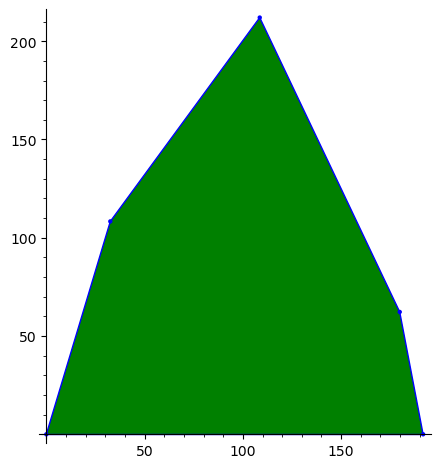

In [97]:
SP.show(axes=True) # show the secondary polytope SP

In [98]:
Ae = [eq[0:] for eq in SP.equations()]
Ai = [ineq[0:] for ineq in SP.inequalities()]

In [99]:
Ae

[(-2404, 0, 0, 10, 3, 6), (-5756, 18, 0, 0, 17, 26), (368, 0, 45, 0, -11, -47)]

In [100]:
Ai

[(5000, 0, 0, 0, -17, -26),
 (368, 0, 0, 0, -1, -2),
 (-72, 0, 0, 0, 0, 1),
 (-4418, 0, 0, 0, 11, 47),
 (0, 0, 0, 0, 1, 0)]